In [4]:
import tensorflow as tf;
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;

In [23]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv");

In [24]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
# one hot encoding to convert categorical variable to numeric values
insurance_one_hot = pd.get_dummies(insurance_data, dtype=np.int16);
insurance_one_hot.head()
# test = pd.get_dummies(insurance_data['sex'], dtype=np.int16);
# test

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [33]:
X = insurance_one_hot.drop('charges', axis=1);
y = insurance_one_hot['charges'];

In [34]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [35]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [41]:
# create the model
tf.random.set_seed(42);
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
]);

# compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
);

# train the model
model.fit(X_train, y_train, epochs=100, verbose=0);

# evaluate the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7477.1616 - mae: 7477.1616


[7477.16162109375, 7477.16162109375]

In [45]:
tf.random.set_seed(42);

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]);


model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
);

history = model_2.fit(X_train, y_train, epochs=100, verbose=0);

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1200      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4916.9941 - mae: 4916.9941


[4916.994140625, 4916.994140625]

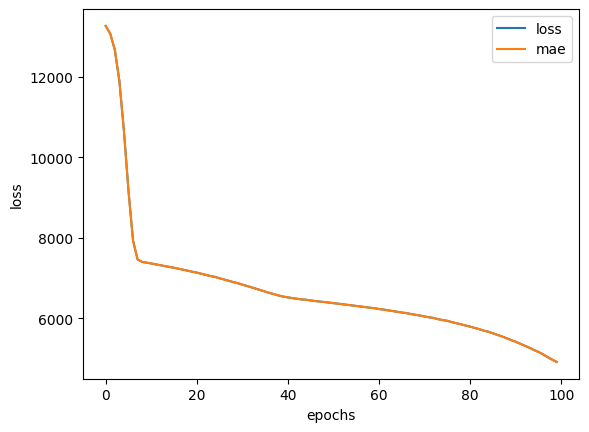

In [46]:
pd.DataFrame(history.history).plot();
plt.ylabel('loss');
plt.xlabel('epochs');

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13325.1689 - mae: 13325.1689
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13191.8350 - mae: 13191.8350
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12913.9258 - mae: 12913.9258
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12343.7871 - mae: 12343.7871
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11321.2139 - mae: 11321.2139
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9873.3730 - mae: 9873.3730
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8405.5635 - mae: 8405.5635
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7573.1289 - mae: 7573.1289
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7411.9590 - mae: 7411.9590
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7389.4307 - mae:

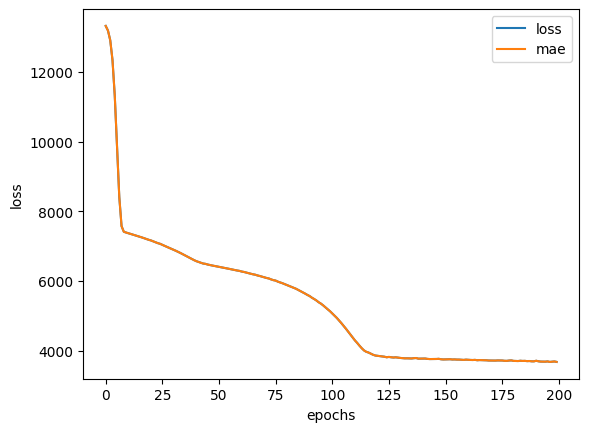

In [49]:
# set random seed
tf.random.set_seed(42);

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]);

# compile model

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
);

# fit model

history_3 = model_3.fit(X_train, y_train, epochs=200);

# evaluate

evalution = model_3.evaluate(X_test, y_test);
print(evalution);

pd.DataFrame(history_3.history).plot();
plt.ylabel('loss');
plt.xlabel('epochs');

## Data Normalization and standarization

<Axes: ylabel='Frequency'>

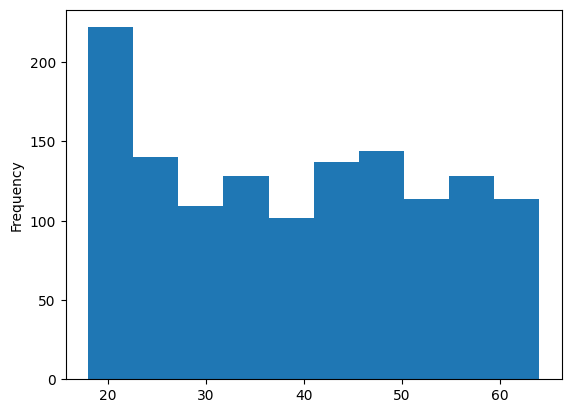

In [50]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

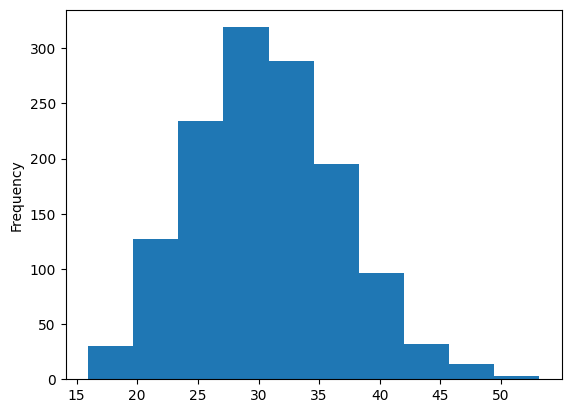

In [51]:
X['bmi'].plot(kind='hist')

In [53]:
from sklearn.compose import make_column_transformer;
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder;
from sklearn.model_selection import train_test_split;

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
);

# create X and y
X = insurance_data.drop('charges', axis=1);
y = insurance_data['charges'];

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);

#
ct.fit(X_train);

X_train_normal = ct.transform(X_train);
X_test_normal = ct.transform(X_test);

X_train_normal, X_test_normal

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

In [55]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [56]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]);


insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
);


insurance_model.fit(X_train_normal, y_train, epochs=100);

insurance_model.evaluate(X_test_normal, y_test)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.0967 - mae: 13344.0967
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.8008 - mae: 13336.8008
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13317.7607 - mae: 13317.7607
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13276.3418 - mae: 13276.3418
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13201.4141 - mae: 13201.4141
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13082.1514 - mae: 13082.1514
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12908.2988 - mae: 12908.2988
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12669.6758 - mae: 12669.6758
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12355.9951 - mae: 12355.9951
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11961.70

[3439.177490234375, 3439.177490234375]